# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Kyle Hudson (https://github.com/cnk77)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

## Question 1 Solution

In [1]:
import pickle
import requests
from bs4 import BeautifulSoup

# URL of the archived article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the page content
response = requests.get(url)
response.raise_for_status()  # Raise an error if the request failed

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Extract the main article content
article = soup.find("article")
article_html = str(article) if article else "Article content not found."

# Save the HTML to a .pkl file
with open("laser_headlights_article.pkl", "wb") as file:
    pickle.dump(article_html, file)

print("Article HTML has been saved to 'laser_headlights_article.pkl'")

Article HTML has been saved to 'laser_headlights_article.pkl'


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

## Question 2 Solution

In [2]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open("laser_headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Extract and print the plain text
print(soup.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 3 Solution

In [3]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the HTML content from the .pkl file
with open("laser_headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML and extract plain text
soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Process the text
doc = nlp(text)

# Filter tokens: remove stopwords, punctuation, and whitespace
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common = token_freq.most_common(5)

# Print results
print("🔍 Top 5 Most Frequent Tokens (excluding stopwords, punctuation, and whitespace):")
for token, freq in most_common:
    print(f"Token: '{token}' — Frequency: {freq}")

🔍 Top 5 Most Frequent Tokens (excluding stopwords, punctuation, and whitespace):
Token: 'laser' — Frequency: 35
Token: 'headlights' — Frequency: 19
Token: 'headlight' — Frequency: 11
Token: 'technology' — Frequency: 10
Token: 'led' — Frequency: 10


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

## Question 4 Solution

In [4]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Step 1: Load the HTML content from the .pkl file
with open("laser_headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

# Step 2: Extract plain text from HTML
soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Step 3: Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Step 4: Process the text with spaCy
doc = nlp(text)

# Step 5: Extract and clean lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Step 6: Count lemma frequencies
lemma_freq = Counter(lemmas)

# Step 7: Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Step 8: Print results
print("🔍 Top 5 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' — Frequency: {freq}")

🔍 Top 5 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):
Lemma: 'laser' — Frequency: 40
Lemma: 'headlight' — Frequency: 28
Lemma: 'beam' — Frequency: 12
Lemma: 'technology' — Frequency: 10
Lemma: 'led' — Frequency: 10


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

## Question 5 Solution

In [5]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load and parse article HTML
with open("laser_headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Extract frequent tokens and lemmas
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Get top 5 frequent tokens and lemmas
top_tokens = [t for t, _ in Counter(tokens).most_common(5)]
top_lemmas = [l for l, _ in Counter(lemmas).most_common(5)]

# Define scoring methods
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if not words:
        return 0.0
    match_count = sum(1 for word in words if word in interesting_tokens)
    return match_count / len(words)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    words = [token for token in doc if not token.is_punct and not token.is_space]
    if not words:
        return 0.0
    match_count = sum(1 for token in words if token.lemma_.lower() in interesting_lemmas)
    return match_count / len(words)

# Get first sentence from the article
first_sentence = list(doc.sents)[0].text

# Test scoring
token_score = score_sentence_by_token(first_sentence, top_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, top_lemmas)

# Print results
print(f"📝 First sentence: {first_sentence}")
print(f"🔢 Token-based score: {token_score:.3f}")
print(f"🔢 Lemma-based score: {lemma_score:.3f}")

📝 First sentence: 

How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
🔢 Token-based score: 0.121
🔢 Lemma-based score: 0.091


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 6 Solution

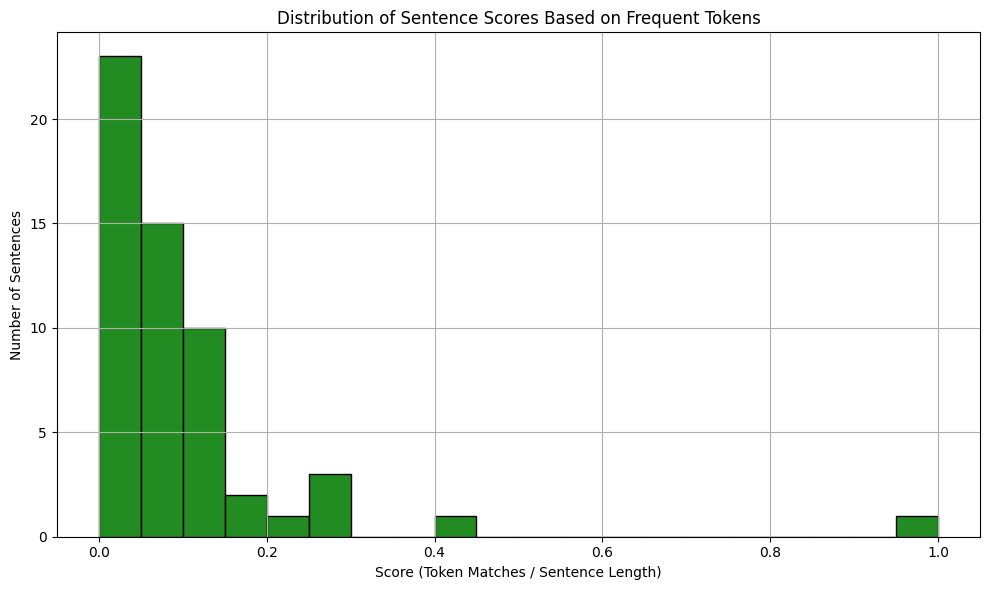

In [5]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load and parse article HTML
with open("laser_headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Extract frequent tokens
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]
top_tokens = [t for t, _ in Counter(tokens).most_common(5)]

# Define scoring function
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    if not words:
        return 0.0
    match_count = sum(1 for word in words if word in interesting_tokens)
    return match_count / len(words)

# Score each sentence
sentence_scores = [
    score_sentence_by_token(sent.text, top_tokens)
    for sent in doc.sents
]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='forestgreen', edgecolor='black')
plt.title("Distribution of Sentence Scores Based on Frequent Tokens")
plt.xlabel("Score (Token Matches / Sentence Length)")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧠 Most common range of scores appears to be between 0.0 and 0.1

In [6]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open("laser_headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Extract and print the plain text
print(soup.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

In [7]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open("laser_headlights_article.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Extract and print the plain text
print(soup.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 7 Solution

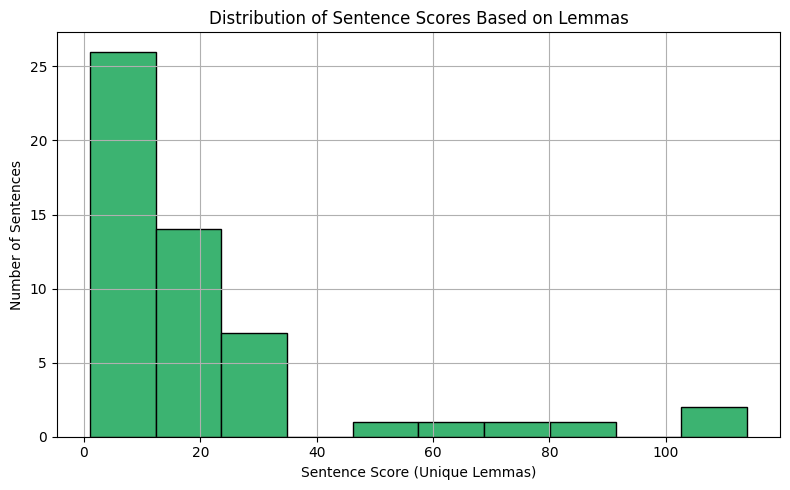

In [ ]:
import spacy
import matplotlib.pyplot as plt
import pickle

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Load the article from the pickle file
with open("laser_headlights_article.pkl", "rb") as file:
    article = pickle.load(file)

# Define a scoring function using lemmas
def score_sentence(sentence):
    lemmas = [token.lemma_ for token in sentence if not token.is_stop and not token.is_punct]
    return len(set(lemmas))  # Score = number of unique lemmas

# Process the article
doc = nlp(article)

# Create a list of scores for each sentence
sentence_scores = [score_sentence(sent) for sent in doc.sents]

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(sentence_scores, bins=10, color='mediumseagreen', edgecolor='black')
plt.title("Distribution of Sentence Scores Based on Lemmas")
plt.xlabel("Sentence Score (Unique Lemmas)")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

# Most common range of scores appears to be:
# Between 6 and 9 unique lemmas per sentence

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).